In [1]:
import os
import librosa
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import pandas as pd
from sklearn.mixture import GaussianMixture
import re
import pickle

In [2]:
DATASET_DIR = 'I:/wav_files/'

In [3]:
classes = os.listdir(DATASET_DIR)
classes = [na for na in classes if na[0]!='.']
print(classes)

['guest', 'presenter', 'report']


In [4]:

dataset = os.listdir(os.path.join(DATASET_DIR, classes[0]))

dataset = [os.path.join(DATASET_DIR, _dir, _file) for _dir in classes for _file in os.listdir(os.path.join(DATASET_DIR, _dir)) if (_file[-1]!='f' and _file[-1]!='c')]


In [5]:
dataset

['I:/wav_files/guest\\00BA15A7-341E-4F65-BA88-EACB688D9746_0.wav',
 'I:/wav_files/guest\\00BA15A7-341E-4F65-BA88-EACB688D9746_1.wav',
 'I:/wav_files/guest\\00BA15A7-341E-4F65-BA88-EACB688D9746_10.wav',
 'I:/wav_files/guest\\00BA15A7-341E-4F65-BA88-EACB688D9746_11.wav',
 'I:/wav_files/guest\\00BA15A7-341E-4F65-BA88-EACB688D9746_12.wav',
 'I:/wav_files/guest\\00BA15A7-341E-4F65-BA88-EACB688D9746_13.wav',
 'I:/wav_files/guest\\00BA15A7-341E-4F65-BA88-EACB688D9746_14.wav',
 'I:/wav_files/guest\\00BA15A7-341E-4F65-BA88-EACB688D9746_15.wav',
 'I:/wav_files/guest\\00BA15A7-341E-4F65-BA88-EACB688D9746_16.wav',
 'I:/wav_files/guest\\00BA15A7-341E-4F65-BA88-EACB688D9746_17.wav',
 'I:/wav_files/guest\\00BA15A7-341E-4F65-BA88-EACB688D9746_18.wav',
 'I:/wav_files/guest\\00BA15A7-341E-4F65-BA88-EACB688D9746_19.wav',
 'I:/wav_files/guest\\00BA15A7-341E-4F65-BA88-EACB688D9746_2.wav',
 'I:/wav_files/guest\\00BA15A7-341E-4F65-BA88-EACB688D9746_20.wav',
 'I:/wav_files/guest\\00BA15A7-341E-4F65-BA88-EACB6

In [6]:
def load_feature(feature_file):
    return pickle.load( open(feature_file, "rb" ) ) 

In [7]:
name = os.listdir(os.path.join(DATASET_DIR, classes[0]))[0]+".spec"
name = os.path.join(DATASET_DIR, classes[0], name)

In [8]:
sam = load_feature(name)

In [9]:
# See https://github.com/yongxuUSTC/sednn/blob/master/mixture2clean_dnn/main_dnn.py

def mat_2d_to_3d(x, agg_num, hop):
    
    len_x, n_in = x.shape
    
    if (len_x < agg_num):
        x = np.concatenate((x, np.zeros((agg_num - len_x, n_in))))
        
    len_x = len(x)
    i1 = 0
    x3d = []
    while (i1 + agg_num <= len_x):
        x3d.append(x[i1 : i1 + agg_num])
        i1 += hop
    return np.array(x3d)

In [10]:
from random import shuffle

# Prepare Test-Train dataset (using shuffle and partitioning)

In [11]:
test = {}
train1 = {}
train2 = {}
#train= {}
for _cls in classes:
    dataset = os.listdir(os.path.join(DATASET_DIR, _cls))
    dataset = [na for na in dataset if na[-1] == 'f']
    print(dataset)
    
    shuffle(dataset)
    _tst_files = int(0.2*(len(dataset)))+1 #tricky
    _trt_files = int(0.4*(len(dataset)))+1 #tricky
    
    test[_cls] = []
    train1[_cls] = []
    train2[_cls] = []
    #train[_cls] = []
    
    for i in range(_tst_files):
        test[_cls].append(os.path.join(DATASET_DIR, _cls, dataset[i]))
        
    for i in range(_tst_files, _trt_files):
        train1[_cls].append(os.path.join(DATASET_DIR, _cls, dataset[i]))
        
    for i in range(_tst_files+_trt_files, len(dataset)):
        train2[_cls].append(os.path.join(DATASET_DIR, _cls, dataset[i]))

    #for i in range(_tst_files, len(dataset)):
     #   train[_cls].append(os.path.join(DATASET_DIR, _cls, dataset[i]))


['00BA15A7-341E-4F65-BA88-EACB688D9746_0.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_1.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_10.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_11.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_12.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_13.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_14.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_15.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_16.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_17.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_18.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_19.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_2.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_20.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_21.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_22.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_3.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_4.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_5.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_6.wav.f', '00BA15A7-341E-4F65-BA88-E

In [12]:
line=test['guest'][1]
C='guest'

def get_file_name(line):
    line=line.split('\\')[1]
    line=line.split('.')[0]
    name_file=line.split('_')[0]
    number_file=line.split('_')[1]
    return name_file,number_file


def get_txt(C,line):
    name_file,number_file=get_file_name(line)
    data = pd.read_csv('J:/text_data_train/'+name_file+'/'+C+'.txt')
    return data['speech'][int(number_file)]
    
    
get_txt(C,line)

' أنا على قناعة بأن هناك نقاشا حاليا في طهران بشأن شكل السياسية الخارجية التي يجب أن تتبناها إيران وأعتقد أن القضية المهمة هي ما عليهم أن يقوموا به في علاقتهم مع أميركا، الإيرانيون يعرفون حق المعرفة أنهم بحاجة إلى الوجود الأميركي في العراق إذا كانوا سيدحرون تنظيم الدولة ذلك أمر يقبله كافة الطيف السياسي في طهران السؤال الآن هو ما هي التصورات الإيرانية للشروط الأميركية لأي تعاون بين البلدين؟ هذا هو فحوى الحوار الجاري في طهران فهناك المتشددون الذين يعتقدون أنهم لا يريدون التعامل مع تنظيم الدولة دون دعم أميركي والتعامل معها لوحدهم وبحلفائهم الشيعة في العراق وبقوتهم الضاربة في المنطقة، لكن هناك آخرون في النظام الإيراني بما فيهم الرئيس حسن روحاني ووزير خارجيته جواد ظريف الذين يعتقدون بخلاف ذلك ويقولون بأن هذا الأمر والتهديد لن يختفي فجأة وأن المنطقة تواجه مشاكل تتجاوز تنظيم الدولة وأن على إيران العمل ليس فقط مع أميركا ولكن أيضا مع الجوار بما فيهم المملكة العربية السعودية، حسب وجهة نظري ذلك هو النقاش الجاري في طهران، الآن يصعب أن نرى أي طرف سيفوز من المعتدلين والمتشددين لكن بالرغم من ذلك هناك

# Get text data  

In [13]:
import itertools
from collections import Counter

def rm_chokel(string):
    Arabic_chokel = r'[\u064B\u064C\u064D\u064E\u064F\u0650\u0651\u0652]'
    regex = re.compile(Arabic_chokel)
    return ''.join(regex.split(string))
            
def Preprocessing(string):
    string= rm_chokel(string)
    string =re.sub('\d', '0', string.lower())
    string =re.sub(r'[^\u0600-\u06FF && 0-9 ]', ' ', string)  
    return (re.sub(r"\s{2,}", " ", string).strip())

def clean_str(text):
    #search = [ "أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!' ,'؛']
    #replace = ["ا","ا","ا","ه"," "," ","","",""," و "," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ','']
    search = [ "_", "-", "/", ".", "،", '"', "ـ", "'", "\\",'\n' , '\t' , '&quot;', '?'  , '؟', '!' , '؛']
    replace = [" ", " ", "" , "" , "" , "" , "", "" ,  "" , ' ' ,  ' ' ,  ' '    , ' ? ', ' ؟',' ! ','']
    text=text.replace('_','نملف')
    
    l_search=['','','']
    l_replace=['?', '؟','!']
    for i in range(0, len(l_search)):
        text = text.replace(l_replace[i],l_search[i])
    
    text = text.strip()
    #print (text)
    
    text=Preprocessing(text)
    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(p_tashkeel,"", text)
    
    #remove longation
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)
    
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    
    for i in range(0, len(search)):
        if(search[i] != '_'):
            text = text.replace(search[i], replace[i])
    
    #trim    
    text = text.strip()

    return text.replace('نملف','_')
def load_data_and_labels(x_text,y):
    """
    Loads MR polarity data from files, splits the data into words and generates labels.
    Returns split sentences and labels.
    """
    # Load data from files
    # Split by words
    #x_text = data['utterance'].as_matrix()
    
    #x_text = data['Summary'].as_matrix()
    
    '''for i in range(len(x_text)):
        if type(x_text[i])==unicode:
            x_text[i]=unicodedata.normalize('NFKD', x_text[i]).encode('ascii','ignore')'''
    x_text = [clean_str(sent) for sent in x_text]
    #print x_text[0:2]
    x_text = [s.split(" ") for s in x_text]
    
    # Generate labels
    
    #y=data['Result'].as_matrix()
#     global encoder
#     encoder = LabelEncoder()
#     encoder.fit(y)
#     encoded_Y = encoder.transform(y)
#     dummy_y=np_utils.to_categorical(encoded_Y)
    #print x_text
    return [x_text, y]


def pad_sentences(sentences, padding_word="<PAD/>"):
    """
    Pads all sentences to the same length. The length is defined by the longest sentence.
    Returns padded sentences.
    """
#     sequence_length = max(len(x) for x in sentences)
#     print (min(len(x) for x in sentences))
#     sequence_length+=1
    print (sequence_length)
    #sequence_length=20
    padded_sentences = []
    for i in range(len(sentences)):
        sentence = sentences[i]
        num_padding = sequence_length - len(sentence)
        #print (type(sentence))
        if num_padding<=0:
            #print(sentence)
            temp=sentence.split()[0:sequence_length-1]
            #print(temp)
            temp.append(padding_word)
            new_sentence=' '.join(temp)
        else:
            new_sentence = sentence + [padding_word] * num_padding
        
        padded_sentences.append(new_sentence)
    print (padded_sentences[0],len(padded_sentences[0]))
    return padded_sentences
    


def build_vocab(sentences):
    """
    Builds a vocabulary mapping from word to index based on the sentences.
    Returns vocabulary mapping and inverse vocabulary mapping.
    """
    # Build vocabulary
    word_counts = Counter(itertools.chain(*sentences))
    # Mapping from index to word
    #print (word_counts)
    #print (word_counts.most_common())
    vocabulary_inv = [x[0] for x in word_counts.most_common()]
    # Mapping from word to index
    vocabulary = {x: i for i, x in enumerate(vocabulary_inv)}
    return [vocabulary, vocabulary_inv]


def build_input_data(sentences, labels, vocabulary):
    """
    Maps sentencs and labels to vectors based on a vocabulary.
    """
    '''for sentence in sentences:
        #print type(sentences)
        print ('*******************************************')
    #    print sentences[0:2]
        for word in sentence:
            print type(word)
    print sentences'''
    x = np.array([[vocabulary[str(word)] for word in sentence] for sentence in sentences])
    print (x.dtype)
    y = np.array(labels)
    return [x, y]


def load_data(x_txt,y_txt):
    """
    Loads and preprocessed data for the MR dataset.
    Returns input vectors, labels, vocabulary, and inverse vocabulary.
    """
    # Load and preprocess data
    sentences, labels = load_data_and_labels(x_txt,y_txt)
    print (sentences[0:2])
    sentences_padded = pad_sentences(sentences)
    vocabulary, vocabulary_inv = build_vocab(sentences_padded)
    #print ('vocab_inv')
    #print (vocabulary_inv)
    #print ('vocab')
    #print (vocabulary)
    x, y = build_input_data(sentences_padded, labels, vocabulary)
    return [x, y, vocabulary, vocabulary_inv]


def batch_iter(data, batch_size, num_epochs):
    """
    Generates a batch iterator for a dataset.
    """
    data = np.array(data)
    data_size = len(data)
    num_batches_per_epoch = int(len(data)/batch_size) + 1
    for epoch in range(num_epochs):
        # Shuffle the data at each epoch
        shuffle_indices = np.random.permutation(np.arange(data_size))
        shuffled_data = data[shuffle_indices]
        for batch_num in range(num_batches_per_epoch):
            start_index = batch_num * batch_size
            end_index = min((batch_num + 1) * batch_size, data_size)
            yield shuffled_data[start_index:end_index]

In [14]:
train2_txt=[]
train1_txt=[]
test_txt=[]
for key, val in train2.items():
    for sample in val:
        train2_txt.append(clean_str(get_txt(key,sample)))
        
for key, val in train1.items():
    for sample in val:
        train1_txt.append(clean_str(get_txt(key,sample)))
        
for key, val in test.items():
    for sample in val:
        test_txt.append(clean_str(get_txt(key,sample)))

In [15]:
data=pd.DataFrame(train1_txt+train2_txt+test_txt)
data[0]

0       لكن أريد أن أرد على كونغرس مان فين يعني الآن ا...
1       إن ما حققته العملية من حيث حجم الدمار الذي أحد...
2       بعد 00 عام على سقوط السلطنة العثمانية وسنترحم ...
3       مساء الخير أخي الحبيب وللضيوف التحية لك ولضيوف...
4       بسم الله الرحمن الرحيم الحقيقة العملية التي نف...
                              ...                        
7596    قد تكون حركة تحرير شمال مالي قد كسبت معركة أكب...
7597    واللاسلطوية التي ظلمتها الترجمة العربية حين سم...
7598    تزداد الهجمات ضد الجيش المصري في سيناء فترد ال...
7599    هناك تحد لمصممي خطوط اللغات اللاتينية لكن التح...
7600    نشأت كارول في تشن جين لكنها انتقلت إلى أميركا ...
Name: 0, Length: 7601, dtype: object

In [16]:
train2_txt=pd.DataFrame(train2_txt)
train1_txt=pd.DataFrame(train1_txt)
test_txt=pd.DataFrame(test_txt)

In [17]:
from tensorflow.keras.preprocessing import text, sequence
#from tensorflow.keras import layers, models, optimizers
from keras.preprocessing.sequence import pad_sequences
# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(data[0])
word_index = token.word_index

Using TensorFlow backend.


In [18]:
#load FastText embeddings
print('loading word embeddings...')
Fast_embeddings_index = {}
f = open('D:/Dataset/word_embeding/Modele de wor2vec/fastTxt_Model.vec',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    Fast_embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(Fast_embeddings_index))

loading word embeddings...
found 771445 word vectors


In [62]:
# convert text to sequence of tokens and pad them to ensure equal length vectors 
train2_txt = sequence.pad_sequences(token.texts_to_sequences(train2_txt[0]), maxlen=100)
train1_txt = sequence.pad_sequences(token.texts_to_sequences(train1_txt[0]), maxlen=100)
test_txt = sequence.pad_sequences(token.texts_to_sequences(test_txt[0]), maxlen=100)

In [19]:
## create token-embedding mapping (FastText)#
##########################################
FastText_embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    
    embedding_vector = Fast_embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        FastText_embedding_matrix[i] = embedding_vector


In [64]:
(FastText_embedding_matrix.shape)

(60549, 300)

In [65]:
np.save('fast_text.npy',FastText_embedding_matrix)

In [67]:
train2_txt.shape

(3798, 100)

In [68]:
np.save('train2_text_multimodal.npy',train2_txt)
np.save('train1_text_multimodal.npy',train1_txt)
np.save('test_text_multimodal.npy',test_txt)

In [23]:
#np.save('FastText_embedding_matrix.npy',FastText_embedding_matrix)

In [69]:
train2_txt=[]
train1_txt=[]
test_txt=[]

# audio data 

In [70]:
def get_features_lst(dataset_files):
    ft_lst = []
    for _fl in dataset_files:
        feat = load_feature(_fl)
        ft_lst.append(feat)
        
    return np.concatenate(ft_lst)

In [71]:
hopping_frames = 8
concat_frames = 32

In [72]:
from keras.utils import to_categorical

In [73]:
classes = train2.keys()
cls_to_id = {cls : i for i, cls in enumerate(classes)}
to_categorical([0,1,1,1,1,1,2]) # how we could use keras utils

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [96]:
# prepare arrays for keras Train_x, Train_y using scaler
import keras
def read_dataset(dic_dataset, concat, hop, scaler):
    ds_x = []
    ds_y = []
    for key, val in dic_dataset.items():
        for sample in val:
            
            _ds_feat = load_feature(sample)
            _ds_feat = scaler.transform(_ds_feat)
            
            _ds_feat =keras.preprocessing.sequence.pad_sequences(_ds_feat.T, maxlen=5000, padding='post', dtype='float32')
            x = mat_2d_to_3d(_ds_feat, concat, hop)
            #print(type(x))
            x = np.expand_dims(x, axis=-1)
            y = [cls_to_id[key]] * x.shape[0]
            ds_x.append(x)
            ds_y.append(y)
            
    return np.concatenate(ds_x), to_categorical(np.concatenate(ds_y))

# Scaler for features

## we use standard scaler on training data and use also for evaluation for test data!


In [97]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=True, with_std=True)

In [98]:
d=dict(train2)
d.update(train1)
d.update(test)

In [99]:
def features_for_scaler(dic_dataset):
    ds_x = []
    for key, val in dic_dataset.items():
        for sample in val:
            
            _ds_feat = load_feature(sample)
            ds_x.append(_ds_feat)
            
    return np.concatenate(ds_x, axis=0)

ft_sc = features_for_scaler(d)

In [100]:
sc.fit(ft_sc)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [101]:
ft_sc=0

In [102]:
tr_x1, tr_y1 = read_dataset(train1, concat_frames, hopping_frames, sc)

In [103]:
tr_x1.shape

(1901, 32, 5000, 1)

In [104]:
np.save('tr_x1_spec_multimodal.npy',tr_x1)
np.save('tr_y1_spec_multimodal.npy',tr_y1)

In [105]:
tr_x1=[]
tr_y1=[]

In [106]:
tr_x2, tr_y2 = read_dataset(train2, concat_frames, hopping_frames, sc)

In [107]:
np.save('tr_x2_spec_multimodal.npy',tr_x2)
np.save('tr_y2_spec_multimodal.npy',tr_y2)

In [108]:
tr_x2=[]
tr_y2=[]

In [109]:
tst_x, tst_y = read_dataset(test, concat_frames, hopping_frames, sc)

In [110]:
np.save('tst_x_spec_multimodal.npy',tst_x)
np.save('tst_y_spec_multimodal.npy',tst_y)

In [111]:
tst_x=[]
tst_y=[]

In [90]:
FastText_embedding_matrix.shape

(60549, 300)

# Prepare data for Neural Network and keras

In [26]:
FastText_embedding_matrix=np.load('fast_text.npy')

In [20]:
train2_txt=np.load('train2_text_multimodal.npy')
train1_txt=np.load('train1_text_multimodal.npy')

In [21]:
tr_x1= np.load('tr_x1_spec_multimodal.npy')
tr_y1= np.load('tr_y1_spec_multimodal.npy')

In [22]:
tr_x2= np.load('tr_x2_spec_multimodal.npy')
tr_y2= np.load('tr_y2_spec_multimodal.npy')

In [23]:
tst_x= np.load('tst_x_spec_multimodal.npy')
tst_y= np.load('tst_y_spec_multimodal.npy')
test_txt=np.load('test_text_multimodal.npy')

In [24]:
tr_x2=np.reshape(tr_x2,(tr_x2.shape[0],tr_x2.shape[1],500,10))
tr_x1=np.reshape(tr_x1,(tr_x1.shape[0],tr_x1.shape[1],500,10))
tst_x=np.reshape(tst_x,(tst_x.shape[0],tst_x.shape[1],500,10))

In [25]:
tr_x2.shape

(3798, 32, 500, 10)

# For unbalanced dataset prepare class weights

In [26]:
z=[]
for t in tr_y2:
    if t[0]==1:
        z.append(1)
    elif t[1]==1:
        z.append(2)
    else:
        z.append(3)


In [27]:
from sklearn.utils import class_weight
from sklearn import model_selection, preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(z)
class_weights = class_weight.compute_class_weight('balanced',np.unique(z),z)
#sample_weights = class_weight.compute_sample_weight('balanced', y)
class_weights_dict = dict(zip(encoder.transform(list(encoder.classes_)), class_weights))
class_weights_dict

{0: 0.7513353115727003, 1: 0.6948408342480791, 2: 4.350515463917525}

In [28]:
cls_weight=class_weights_dict

In [29]:
train2_txt

array([[17401,   342,    30, ...,   710,     1,    85],
       [    0,     0,     0, ...,    19,  5360,    46],
       [    3,     7,    28, ...,  8608, 13349, 19493],
       ...,
       [    0,     0,     0, ...,  7123, 53032, 53033],
       [    0,     0,     0, ...,     1,  3058, 15681],
       [    0,     0,     0, ...,  3097,     2,  3902]])

# Multimodal deep learning

In [30]:
from keras.layers import  Input,Dense, Dropout, Activation, Flatten, Permute, Lambda, Input, merge, BatchNormalization, Embedding, LSTM, Bidirectional, Reshape, GRU, ELU
from keras.layers import Convolution1D, GlobalMaxPooling1D, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, MaxPooling1D
from keras.regularizers import l2, l1
from keras import regularizers
from keras.models import Sequential, Model
import logging
from keras import backend as K
import keras
import numpy as np
import pickle
import common
from keras.layers import merge  
############
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input,BatchNormalization,Activation,ELU,Reshape
from keras.layers import Conv1D, Conv2D, MaxPooling2D,MaxPool1D, GlobalMaxPool1D,GlobalMaxPool2D, GlobalAveragePooling1D, \
    concatenate
from keras.layers.convolutional import Convolution1D,Convolution2D
from keras import optimizers, losses, activations, models
from keras import backend as K
import keras
from keras import layers
from keras.constraints import maxnorm


In [31]:
def show_summary_stats(history):
    # List all data in history
    print(history.history.keys())

    # Summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
import matplotlib.pyplot as plt
def plot_curve(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

#weighted_prediction = wclf.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
#def print_results(y, weighted_prediction):
 #   print ('Accuracy:', accuracy_score(y, weighted_prediction))
  #  print ('F1 score:', f1_score(y, weighted_prediction,average='weighted'))
   # print ('Recall:', recall_score(y, weighted_prediction,average='weighted'))
    #print ('Precision:', precision_score(y, weighted_prediction,average='weighted'))
    #labels =[0,1,2,3]
    #target_names = ['suivant','precedent','courant','autres']
    #print(classification_report(y,weighted_prediction,labels=labels,target_names= target_names,digits=3))
    
def print_results(y, weighted_prediction):
    print ('Accuracy:', accuracy_score(y, weighted_prediction))
    print ('F1 score:', f1_score(y, weighted_prediction,average='weighted'))
    print ('Recall:', recall_score(y, weighted_prediction,average='weighted'))
    print ('Precision:', precision_score(y, weighted_prediction,average='weighted'))
    labels =[0,1,2]
    target_names = ['presenter','report','guest']
    print(classification_report(y,weighted_prediction,labels=labels,target_names= target_names,digits=3))


In [38]:
#tr_x2=np.reshape(tr_x2,(tr_x2.shape[0],tr_x2.shape[1],tr_x2.shape[2],1))
#tr_x1=np.reshape(tr_x1,(tr_x1.shape[0],tr_x1.shape[1],tr_x1.shape[2],1))
#tst_x=np.reshape(tst_x,(tst_x.shape[0],tst_x.shape[1],tst_x.shape[2],1))


In [33]:
#word_index=60470

In [123]:
inp = Input(shape=(32,500,10,),name='audio')
process_audio = Conv2D(32, kernel_size=(3, 7),
                 activation='relu')(inp)

process_audio = Conv2D(64, (3, 7), activation='relu')(process_audio)
process_audio = MaxPooling2D(pool_size=(2, 2))(process_audio)
process_audio = Dropout(0.5)(process_audio)
################################
process_audio = Conv2D(128, (3, 7), activation='relu')(process_audio)
process_audio = MaxPooling2D(pool_size=(2, 2))(process_audio)
process_audio = Dropout(0.5)(process_audio)

process_audio = Conv2D(64, (3, 7), activation='relu')(process_audio)
process_audio = MaxPooling2D(pool_size=(2, 2))(process_audio)
process_audio = Dropout(0.5)(process_audio)
process_audio = Flatten()(process_audio)
#process_audio = Dense(128, activation='relu')(process_audio)

wordlevel_input = layers.Input(shape=(100,), name='text')
x= layers.Embedding(len(word_index) + 1, 300, weights=[FastText_embedding_matrix], trainable=False)(wordlevel_input)
x = layers.Bidirectional(layers.GRU(128, activation='relu',dropout=0.5,recurrent_dropout=0.5,kernel_constraint=maxnorm(3),return_sequences=True))(x)
x =layers.BatchNormalization()(x)
x = (layers.GRU(128, activation='relu',dropout=0.5,recurrent_dropout=0.5,kernel_constraint=maxnorm(3)))(x)
x =layers.BatchNormalization()(x)
#x= Dense(128, activation='relu')(x)
concatenated = layers.concatenate([x, process_audio], axis=1)
#concatenated = layers.Dense(128, activation="relu")(concatenated)
#concatenated = layers.Dropout(0.5)(concatenated)
concatenated = layers.Dense(128, activation="relu")(concatenated)
concatenated = layers.Dropout(0.5)(concatenated)
main_output = layers.Dense(3, activation='sigmoid')(concatenated)




In [124]:
model = Model([inp,wordlevel_input], main_output)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
audio (InputLayer)              (None, 32, 500, 10)  0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 30, 494, 32)  6752        audio[0][0]                      
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 28, 488, 64)  43072       conv2d_13[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_10 (MaxPooling2D) (None, 14, 244, 64)  0           conv2d_14[0][0]                  
__________________________________________________________________________________________________
dropout_11

In [125]:
from keras.utils import plot_model
plot_model(model, to_file='C:/Users/dhi/Desktop/model.png')

In [126]:

saver = keras.callbacks.ModelCheckpoint('model_multimodal_mfcc.h5', monitor='val_loss', verbose=0, save_best_only=True,
                                save_weights_only=False, mode='auto', period=1)

lron = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=5, min_lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit({'audio':tr_x2,'text':train2_txt}, tr_y2,
          batch_size=64,
          epochs=200,
          shuffle=True,
          verbose=1,
          validation_data=({'audio':tr_x1,'text':train1_txt}, tr_y1),
          callbacks=[saver, lron],
         class_weight = cls_weight 
         )



W1021 16:56:04.623126 16288 deprecation.py:323] From C:\Users\dhi\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3798 samples, validate on 1901 samples
Epoch 1/200
3798/3798 [==============================] - 53s 14ms/step - loss: 1.0627 - acc: 0.5561 - val_loss: 0.9930 - val_acc: 0.6665
Epoch 2/200
3798/3798 [==============================] - 44s 12ms/step - loss: 0.9532 - acc: 0.6319 - val_loss: 0.7526 - val_acc: 0.6323
Epoch 3/200
3798/3798 [==============================] - 46s 12ms/step - loss: 0.7989 - acc: 0.6509 - val_loss: 0.6439 - val_acc: 0.7407
Epoch 4/200
3798/3798 [==============================] - 48s 13ms/step - loss: 0.6528 - acc: 0.7299 - val_loss: 0.4539 - val_acc: 0.8411
Epoch 5/200
3798/3798 [==============================] - 45s 12ms/step - loss: 0.5049 - acc: 0.7967 - val_loss: 0.4390 - val_acc: 0.8375
Epoch 6/200
3798/3798 [==============================] - 45s 12ms/step - loss: 0.4703 - acc: 0.8217 - val_loss: 0.3841 - val_acc: 0.8501
Epoch 7/200
3798/3798 [==============================] - 46s 12ms/step - loss: 0.4221 - acc: 0.8352 - val_loss: 0.3453 - val_acc: 

3798/3798 [==============================] - 44s 12ms/step - loss: 0.1733 - acc: 0.9315 - val_loss: 0.3855 - val_acc: 0.8890
Epoch 61/200
3798/3798 [==============================] - 43s 11ms/step - loss: 0.1559 - acc: 0.9323 - val_loss: 0.3325 - val_acc: 0.9032
Epoch 62/200
3798/3798 [==============================] - 44s 11ms/step - loss: 0.1447 - acc: 0.9394 - val_loss: 0.3341 - val_acc: 0.9022
Epoch 63/200
3798/3798 [==============================] - 43s 11ms/step - loss: 0.1363 - acc: 0.9444 - val_loss: 0.3258 - val_acc: 0.8995
Epoch 64/200
3798/3798 [==============================] - 43s 11ms/step - loss: 0.1252 - acc: 0.9437 - val_loss: 0.3367 - val_acc: 0.9053
Epoch 65/200
3798/3798 [==============================] - 44s 11ms/step - loss: 0.1137 - acc: 0.9521 - val_loss: 0.3403 - val_acc: 0.9011
Epoch 66/200
3798/3798 [==============================] - 43s 11ms/step - loss: 0.1304 - acc: 0.9421 - val_loss: 0.3255 - val_acc: 0.9058
Epoch 67/200
3798/3798 [=======================

3798/3798 [==============================] - 47s 12ms/step - loss: 0.0691 - acc: 0.9705 - val_loss: 0.5247 - val_acc: 0.8785
Epoch 179/200
3798/3798 [==============================] - 47s 12ms/step - loss: 0.1074 - acc: 0.9642 - val_loss: 0.4098 - val_acc: 0.9016
Epoch 180/200
3798/3798 [==============================] - 48s 13ms/step - loss: 0.0910 - acc: 0.9602 - val_loss: 0.4230 - val_acc: 0.9048
Epoch 181/200
3798/3798 [==============================] - 48s 13ms/step - loss: 0.0764 - acc: 0.9652 - val_loss: 0.3918 - val_acc: 0.9079
Epoch 182/200
3798/3798 [==============================] - 48s 13ms/step - loss: 0.0656 - acc: 0.9729 - val_loss: 0.3890 - val_acc: 0.9043
Epoch 183/200
3798/3798 [==============================] - 47s 12ms/step - loss: 0.0994 - acc: 0.9658 - val_loss: 0.5080 - val_acc: 0.8664
Epoch 184/200
3798/3798 [==============================] - 45s 12ms/step - loss: 0.1256 - acc: 0.9497 - val_loss: 0.4430 - val_acc: 0.8827
Epoch 185/200
3798/3798 [================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


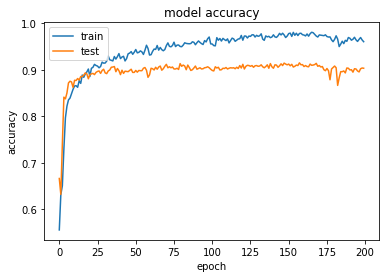

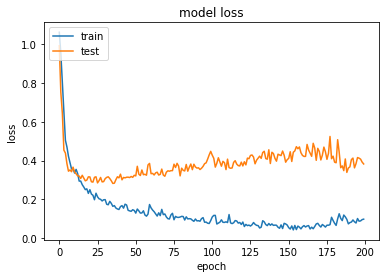

In [127]:
show_summary_stats(model.history)

In [128]:
model.load_weights('model_multimodal_mfcc.h5')
# save the model to disk
filename = 'model_multimodal_mfcc.h5'
pickle.dump(model, open(filename, 'wb'))

In [6]:
# load the model from disk
loaded_model = pickle.load(open('model_multimodal_mfcc.h5', 'rb'))

score = loaded_model.evaluate({'audio':tst_x,'text':test_txt}, tst_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.
W1022 09:28:11.562874 13036 deprecation_wrapper.py:119] From C:\Users\dhi\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1022 09:28:11.620052 13036 deprecation_wrapper.py:119] From C:\Users\dhi\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1022 09:28:11.623043 13036 deprecation_wrapper.py:119] From C:\Users\dhi\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1022 09:28:11.673234 13036 deprecation_wrapper.py:119] From C:\Users\dhi\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1022 09:28:1

Test loss: 0.2251672697744159
Test accuracy: 0.9211356464996698


In [7]:
predictions= loaded_model.predict({'audio':tst_x,'text':test_txt}, verbose=1)
weighted_prediction = np.argmax(predictions, axis=1)

1902/1902 [==============================] - 12s 6ms/step


In [133]:
y = np.argmax(tst_y, axis=1)
print_results(y , weighted_prediction)

Accuracy: 0.9211356466876972
F1 score: 0.9220345440658775
Recall: 0.9211356466876972
Precision: 0.9240037301434775
              precision    recall  f1-score   support

   presenter      0.927     0.925     0.926       843
      report      0.949     0.923     0.936       913
       guest      0.746     0.884     0.809       146

    accuracy                          0.921      1902
   macro avg      0.874     0.911     0.890      1902
weighted avg      0.924     0.921     0.922      1902



Normalized confusion matrix
[[0.93 0.04 0.03]
 [0.06 0.92 0.02]
 [0.05 0.06 0.88]]


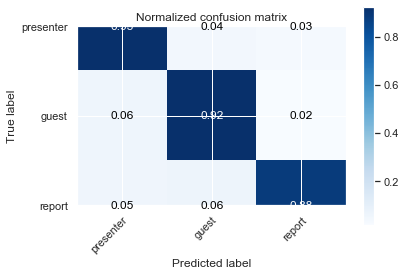

In [18]:
import itertools
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
class_names=['presenter','guest','report']
# Plot normalized confusion matrix
#plot_confusion_matrix(np.argmax(valid_y, axis=1),weighted_prediction , classes=np.asarray(['presenter','guest','report']), normalize=True,title='Normalized confusion matrix')

#plt.show()
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)
class_names=['presenter','guest','report']
# Plot normalized confusion matrix
plot_confusion_matrix(np.argmax(tst_y, axis=1),weighted_prediction , classes=np.asarray(['presenter','guest','report']), normalize=True,title='Normalized confusion matrix')

plt.show()
#plt.savefig('filename.png', dpi=300)

In [33]:
np.save('D:/tst_y_multimodal.npy',np.argmax(tst_y, axis=1))
np.save('D:/weighted_prediction_multimodal.npy',weighted_prediction)

# average mode #######

In [37]:
from keras.layers import Layer
class WeightedSum(Layer):

    def __init__(self, a, **kwargs):
        self.a = a  # "weight" of the weighted sum
        super(WeightedSum, self).__init__(**kwargs)

    def call(self, model_outputs):
        return self.a * model_outputs[0] + (1 - self.a) * model_outputs[1]

    def compute_output_shape(self, input_shape):
        return input_shape[0]

In [54]:
inp = Input(shape=(32,500,10,),name='audio')
process_audio = Conv2D(32, kernel_size=(3, 7),
                 activation='relu')(inp)

process_audio = Conv2D(64, (3, 7), activation='relu')(process_audio)
process_audio = MaxPooling2D(pool_size=(2, 2))(process_audio)
process_audio = Dropout(0.5)(process_audio)
################################
process_audio = Conv2D(128, (3, 7), activation='relu')(process_audio)
process_audio = MaxPooling2D(pool_size=(2, 2))(process_audio)
process_audio = Dropout(0.5)(process_audio)

process_audio = Conv2D(64, (3, 7), activation='relu')(process_audio)
process_audio = MaxPooling2D(pool_size=(2, 2))(process_audio)
process_audio = Dropout(0.5)(process_audio)
process_audio = Flatten()(process_audio)
#process_audio = Dense(128, activation='relu')(process_audio)

wordlevel_input = layers.Input(shape=(100,), name='text')
x= layers.Embedding(len(word_index)+1, 300, weights=[FastText_embedding_matrix], trainable=False)(wordlevel_input)
x = layers.Bidirectional(layers.GRU(128, activation='relu',dropout=0.5,recurrent_dropout=0.5,kernel_constraint=maxnorm(3),return_sequences=True))(x)
x =layers.BatchNormalization()(x)
x = (layers.GRU(128, activation='relu',dropout=0.5,recurrent_dropout=0.5,kernel_constraint=maxnorm(3)))(x)
x =layers.BatchNormalization()(x)
#x= Dense(128, activation='relu')(x)
#concatenated = WeightedSum(0.1)([x, process_audio])
concatenated = layers.Average([x, process_audio],)

#concatenated = layers.Dense(128, activation="relu")(concatenated)
#concatenated = layers.Dropout(0.5)(concatenated)
concatenated = layers.Dense(128, activation="relu")(concatenated)
concatenated = layers.Dropout(0.5)(concatenated)
main_output = layers.Dense(3, activation='sigmoid')(concatenated)




TypeError: __init__() takes 1 positional argument but 2 were given

In [45]:
model = Model([inp,wordlevel_input], main_output)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
audio (InputLayer)              (None, 32, 500, 10)  0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 30, 494, 32)  6752        audio[0][0]                      
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 28, 488, 64)  43072       conv2d_25[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_19 (MaxPooling2D) (None, 14, 244, 64)  0           conv2d_26[0][0]                  
__________________________________________________________________________________________________
dropout_21

In [46]:

saver = keras.callbacks.ModelCheckpoint('model_multimodal_mfcc.h5', monitor='val_loss', verbose=0, save_best_only=True,
                                save_weights_only=False, mode='auto', period=1)

lron = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=5, min_lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit({'audio':tr_x2,'text':train2_txt}, tr_y2,
          batch_size=64,
          epochs=200,
          shuffle=True,
          verbose=1,
          validation_data=({'audio':tr_x1,'text':train1_txt}, tr_y1),
          callbacks=[saver, lron],
         class_weight = cls_weight 
         )


Train on 3798 samples, validate on 1901 samples
Epoch 1/200


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument: Incompatible shapes: [64,128] vs. [64,7168]
	 [[{{node weighted_sum_2/add}}]]
	 [[loss_2/mul/_1325]]
  (1) Invalid argument: Incompatible shapes: [64,128] vs. [64,7168]
	 [[{{node weighted_sum_2/add}}]]
0 successful operations.
0 derived errors ignored.

In [ ]:
show_summary_stats(model.history)

In [ ]:
model.load_weights('model_multimodal_mfcc.h5')
# save the model to disk
filename = 'model_multimodal_mfcc.h5'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open('model_multimodal_mfcc.h5', 'rb'))

score = loaded_model.evaluate({'audio':tst_x,'text':test_txt}, tst_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
predictions= loaded_model.predict({'audio':tst_x,'text':test_txt}, verbose=1)
weighted_prediction = np.argmax(predictions, axis=1)

In [ ]:
y = np.argmax(tst_y, axis=1)
print_results(y , weighted_prediction)

In [3]:
string = 'je suis gentil'
key = 'crypt'
list3 = []
i=0

for ind, lettre in enumerate(string):
   if lettre == ' ' :
       list3.insert(ind,' ')
       #list3[ind] = list3[ind+1]
       i=i+1
   else : list3.insert(ind,key[(ind%len(key))-i])
print (list3)

['c', 'r', ' ', 'y', 'p', 't', 'c', ' ', 'r', 'y', 'p', 't', 'c', 'r']
